<a href="https://colab.research.google.com/github/bingxiaochen/ST554/blob/main/ST_554_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Bing Chen

Date: 2/5/2026


# Bring in Homework 3 Code

## Summarizing Data Numerically



### Task 1. Read in data and look at the first few observations

In [79]:
import pandas as pd
student_data = pd.read_csv('https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt', sep = ";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Task 2: Summarize the Data




#### Categorical variables


##### Create a one-way contingency table, a two-way contingency table, and a three-way contingency table
– Interpret a number from each resulting table (that is, pick out a value produced and explain what
that value means.)

###### 1. One-way contingency table of school

In [80]:
student_data.school.value_counts()

,count
school,
GP,349
MS,46


This one-way contingency table summarizes the number of students in each school. There are 349 students in Gabriel Pereira and 46 students in Mousinho da Silveira.

###### 2. Two-way contingency table of school and sex

In [81]:
pd.crosstab(index=student_data.school, columns=student_data.sex)

sex,F,M
school,,
GP,183,166
MS,25,21


There are 183 Females in Gabriel Pereira school.

###### 3. Three-way contingency table of school, sex, and family size.

In [82]:
pd.crosstab(
    [student_data.school, student_data.sex],
    student_data.famsize,
    margins=True
)

famsize     GT3  LE3  All
school sex               
GP     F    139   44  183
       M    113   53  166
MS     F     17    8   25
       M     12    9   21
All         281  114  395

There are 139 female students at GP school who have a family size of 3 or more (GT3).

##### Create a conditional two-way table using 2 methods.

###### Method 1. Subsetting the data and then creating the two-way table.

Let's create the a table with only family size greater or equal to 3.

First, subset the data to only include data where family size is greater or equal to 3.

In [83]:
famsize_gt3 = student_data.loc[student_data.famsize == 'GT3']

Then, create the two-way table.

In [84]:
pd.crosstab(
    index = [famsize_gt3.school, famsize_gt3.sex],
    columns = famsize_gt3.famsize
)

famsize     GT3
school sex     
GP     F    139
       M    113
MS     F     17
       M     12

###### Method 2. Creating a three-way table and subsetting it.

First, save the three way table created.

In [85]:
table = pd.crosstab(
    [student_data.school, student_data.sex],
    student_data.famsize,
    margins=True
)

Then, subset it to only output where famsize == GT3.

In [86]:
table['GT3']

school  sex
GP      F      139
        M      113
MS      F       17
        M       12
All            281
Name: GT3, dtype: int64

#### Numeric Variables

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

##### Find measures of center and spread for three of he numeric variables.

Center and spread for G1:

In [87]:
import numpy as np
student_data.G1.mean()

np.float64(10.90886075949367)

In [88]:
student_data.G1.std()

3.3191946715076686

Center and Spread of G2:


In [89]:
print(student_data.G2.mean())
student_data.G2.std()

10.713924050632912


3.761504659556034

Center and Spread of G3:

In [90]:
print(student_data.G3.mean())
student_data.G3.std()

10.415189873417722


4.5814426109978434

Find the center and spread for G1, G2, and G3 scores for female only.

First subset the student data to only contain female data.

In [91]:
female_student_data = student_data.loc[student_data["sex"] == "F"]
female_student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Center and spread for G1:

In [92]:
print(female_student_data.G1.mean())
female_student_data.G1.std()

10.620192307692308


3.23253029943296

Another way to do it: directly subset and find the mean and std in one line.

In [93]:
print(student_data.loc[student_data["sex"] == "F"].G1.mean())
print(student_data.loc[student_data["sex"] == "F"].G1.std())

10.620192307692308
3.23253029943296


They returns the same values.

Center and spread for G2:

In [94]:
print(female_student_data.G2.mean())
female_student_data.G2.std()

10.389423076923077


3.641850627641701

Center and spread for G3:

In [95]:
print(female_student_data.G3.mean())
female_student_data.G3.std()

9.966346153846153


4.622338337431135

###### Find measures of center and spread across sex: for these variables.

In [96]:
student_data.groupby("sex")[["G1", "G2", "G3"]].agg(["mean", "std"])

G1                   G2                   G3          
          mean       std       mean       std       mean       std
sex                                                               
F    10.620192  3.232530  10.389423  3.641851   9.966346  4.622338
M    11.229947  3.392839  11.074866  3.868088  10.914439  4.495297

Find measures of center and spread across sex and whether student has extra-curricular activities or not for the three variables.

In [97]:
student_data.groupby(["sex","activities"])[["G1", "G2", "G3"]].agg(["mean", "std"])


G1                   G2                   G3          
                     mean       std       mean       std       mean       std
sex activities                                                               
F   no          10.812500  3.481046  10.571429  3.711958  10.464286  4.378343
    yes         10.395833  2.918107  10.177083  3.565905   9.385417  4.850111
M   no          10.585366  3.355302  10.451220  3.960149  10.170732  4.655555
    yes         11.733333  3.351999  11.561905  3.741462  11.495238  4.299203

###### Create a correlation matrix between all of the numeric variables.


Check which variables are numeric.

In [98]:
student_data.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


Select numeric variables and output their correlation matrix.

In [99]:
student_data.select_dtypes(include='number').corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


# Task 1

## Categorical variables

Create a stacked bar graph and a side-by-side bar graph.

First, import `matplotlib.pyplot` module.

In [100]:
import matplotlib.pyplot as plt

let's convert variables types to category for better labelling.

In [101]:
#sex variable
student_data["sexC"] = student_data.sex.astype("category")
student_data.sexC = student_data.sexC.cat.rename_categories(["Female", "Male"])

#school variable
student_data["schoolC"] = student_data.school.astype("category")
student_data.schoolC = student_data.schoolC.cat.rename_categories(["Gabriel Pereira", "Mousinho da Silveira"])

### Stacked Bar Graph

To create a stacked bar graph of school and sex, we need to save the two way table computed previously.

In [102]:
stack_table = pd.crosstab(index=student_data.schoolC, columns=student_data.sexC)
stack_table

sexC,Female,Male
schoolC,,
Gabriel Pereira,183,166
Mousinho da Silveira,25,21


Then, we want to get the heights for the sex bars and check if the ordering of the levels of school matches the count.


In [103]:
stack_table.loc[:, "Female"]

,Female
schoolC,
Gabriel Pereira,183
Mousinho da Silveira,25


In [104]:
print(student_data.schoolC.cat.categories)

Index(['Gabriel Pereira', 'Mousinho da Silveira'], dtype='object')


Then, start the plot.

<BarContainer object of 2 artists>

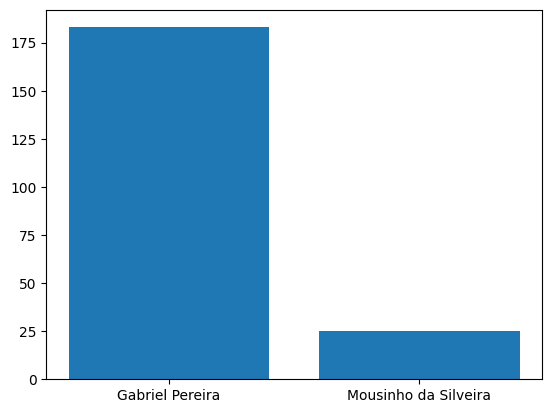

In [105]:
plt.bar(
  x = student_data.schoolC.cat.categories,
  height = stack_table.loc[:, "Female"],
  label = "Female")

Then, get the counts for male students at each school.


In [106]:
stack_table.loc[:,"Male"]

,Male
schoolC,
Gabriel Pereira,166
Mousinho da Silveira,21


Then, put them together by specify where bottom of the plot should start. Then add nice labels and a title.

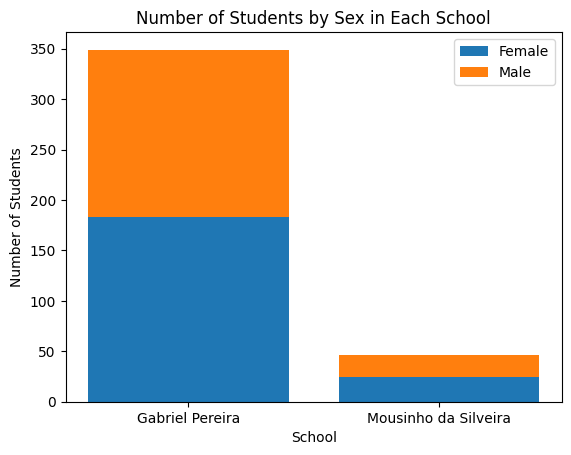

In [107]:
plt.bar(
  x = student_data.schoolC.cat.categories,
  height = stack_table.loc[:, "Female"],
  label = "Female")
plt.bar(
  x = student_data.schoolC.cat.categories,
  height = stack_table.loc[:, "Male"],
  bottom = stack_table.loc[:, "Female"],
  label = "Male"
)
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Number of Students by Sex in Each School")
plt.legend()

### Side-by-side Bar Graph

To create a side by side bar graph, we start by change the x values from the categories to numbers using the same two-way table created. Then, adjust the width of the bars, fix the labels, and put the bars next to each other.

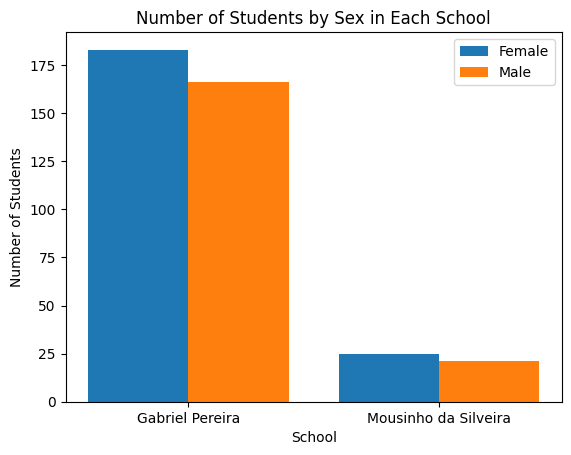

In [108]:
plt.bar(
  x = [1, 2],
  height = stack_table.loc[:, "Female"],
  width = 0.4,
  label = "Female")
plt.bar(
  x = [1.4, 2.4],
  height = stack_table.loc[:, "Male"],
  width = 0.4,
  label = "Male")
plt.xticks([1.2, 2.2], student_data.schoolC.cat.categories)
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Number of Students by Sex in Each School")
plt.legend()

## Numeric Variables

Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables.

### Histogram of G1 Across School

Set up the bins.


In [109]:
bin_ends = 10
bins = [i*max(student_data.G1)/bin_ends for i in range(0, bin_ends + 1)]
print(bins)

[0.0, 1.9, 3.8, 5.7, 7.6, 9.5, 11.4, 13.3, 15.2, 17.1, 19.0]


Obtain subsets needed.

In [110]:
GP_G1 = student_data.loc[student_data.schoolC == "Gabriel Pereira", "G1"]
MS_G1 = student_data.loc[student_data.schoolC == "Mousinho da Silveira", "G1"]

Create the plot.

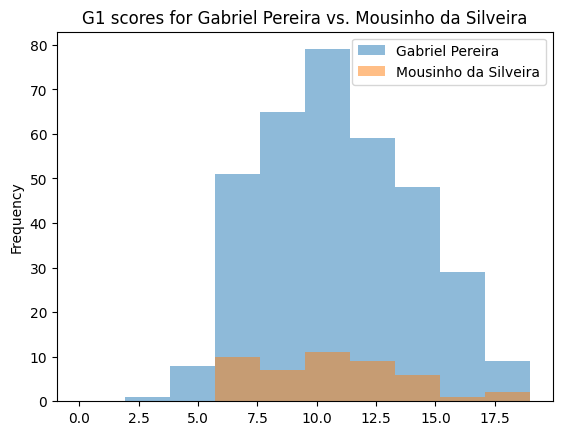

In [111]:
GP_G1.plot.hist(bins = bins, alpha = 0.5, label = "Gabriel Pereira",
                   title = "G1 scores for Gabriel Pereira vs. Mousinho da Silveira") \
                   .set(xlabel = "G1 Scores")
MS_G1.plot.hist(bins = bins, alpha = 0.5, label = "Mousinho da Silveira")
plt.legend()

G1 score distributions for Gabriel Pereira and Mousinho da Silveira show substantial overlap and similar mean overall. However, Gabriel Pereira seems to have greater variability. Another notable comparison is that they have very unequal number of students/sample sizes.

### Histogram for G2 Across schools

/tmp/ipython-input-3524487369.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_data.hist(column = "G2", by = "schoolC")


Text(0, 0.5, 'Frequency')

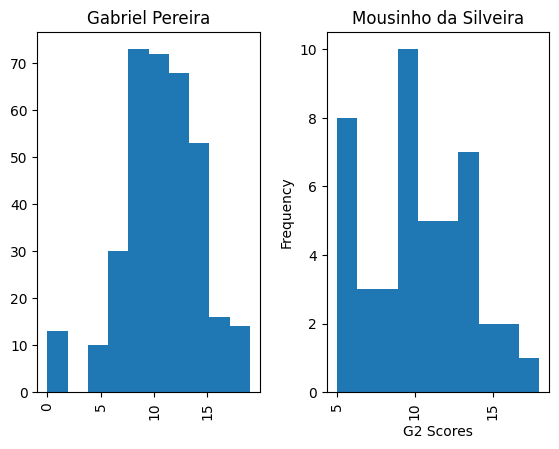

In [112]:
student_data.hist(column = "G2", by = "schoolC")
plt.xlabel("G2 Scores")
plt.ylabel("Frequency")

Note that they are on very different y scale, Gabriel Pereira have much more student than Mousinho da Silveira. Gabriel Pereira shows a wider spread, with scores ranging from very low values, near 0, up to high values. Gabriel Pereira’s distribution looks smoother, which is expected with greater sample size.

### Kernel density plot of age across school

Text(0.5, 1.0, 'Density of Age for Gabriel Pereira vs. Mousinho da Silveira')

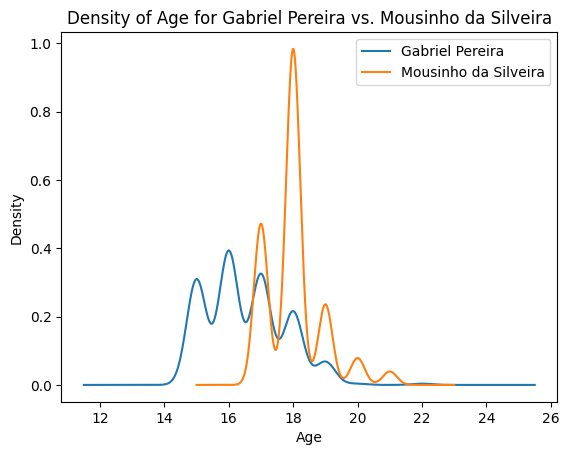

In [113]:

student_data["age"].loc[student_data["schoolC"] == "Gabriel Pereira"].plot.density(
    label = "Gabriel Pereira",
    bw_method = 0.25)
student_data["age"].loc[student_data["schoolC"] == "Mousinho da Silveira"].plot.density(
    label = "Mousinho da Silveira",
    bw_method = 0.25)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density of Age for Gabriel Pereira vs. Mousinho da Silveira")



Students from Mousinho da Silveira is overall older than students from Gabriel Pereira.

### Kernel density plot of G3 scores by school

Text(0.5, 1.0, 'Density of G3 scores for Gabriel Pereira vs. Mousinho da Silveira')

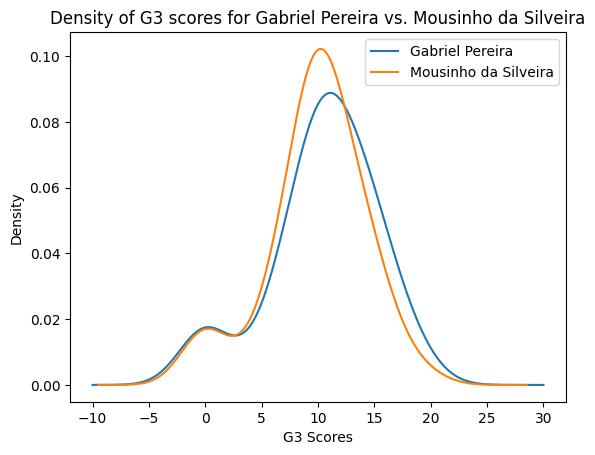

In [114]:
student_data["G3"].loc[student_data["schoolC"] == "Gabriel Pereira"].plot.density(
    label = "Gabriel Pereira",
    bw_method = 0.5)
student_data["G3"].loc[student_data["schoolC"] == "Mousinho da Silveira"].plot.density(
    label = "Mousinho da Silveira",
    bw_method = 0.5)
plt.legend()
plt.xlabel("G3 Scores")
plt.ylabel("Density")
plt.title("Density of G3 scores for Gabriel Pereira vs. Mousinho da Silveira")


On average, students from Mousinho da Silveira have lower G3 scores, though the distributions largely overlap.

### Boxplot of G1 scores by school

Text(0.5, 1.0, 'G1 scores for Gabriel Pereira vs. Mousinho da Silveira')

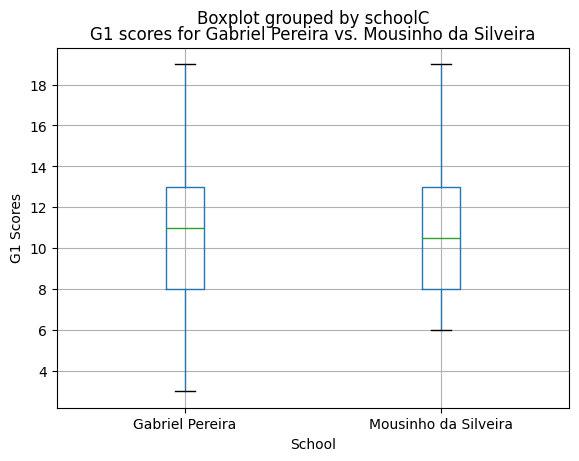

In [115]:
student_data.boxplot(column = ["G1"], by = "schoolC")
plt.ylabel("G1 Scores")
plt.xlabel("School")
plt.title("G1 scores for Gabriel Pereira vs. Mousinho da Silveira")


G1 scores appears to be normal for Gabriel Pereira and slightly right skewed for Mousinho da Silveira.

### Boxplot of G2 scores by school

Text(0.5, 1.0, 'G2 scores for Gabriel Pereira vs. Mousinho da Silveira')

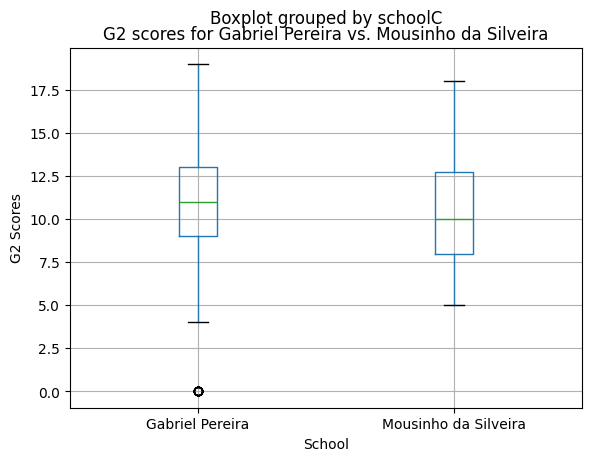

In [116]:
student_data.boxplot(column = ["G2"], by = "schoolC")
plt.ylabel("G2 Scores")
plt.xlabel("School")
plt.title("G2 scores for Gabriel Pereira vs. Mousinho da Silveira")

G2 scores for both school appears to have same trend with G1 scores. However, there is an outlier for Gabriel Pereira.

### Scatterplots of G3 and G1.

Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by
a categorical variable in each. Add appropriate labels and titles.

/tmp/ipython-input-3628585281.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


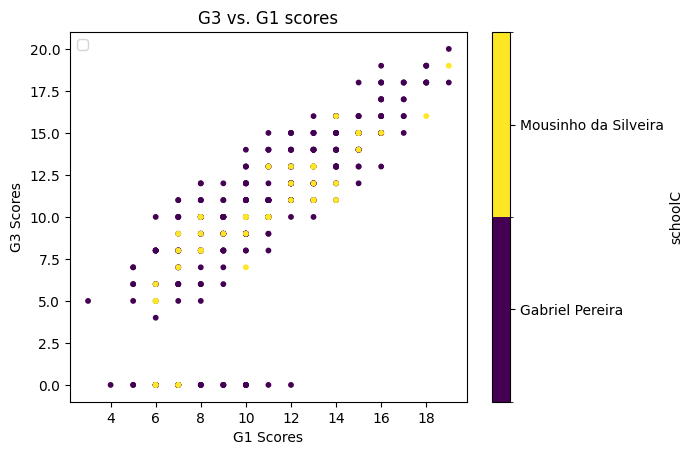

In [117]:
student_data.plot.scatter(x = "G1", y = "G3", c = "schoolC", cmap = "viridis", s = 10)
plt.title("G3 vs. G1 scores")
plt.xlabel("G1 Scores")
plt.ylabel("G3 Scores")
plt.legend()

The plot suggests a positive association with G1 and G3 scores. Student with higher G1 scores tends to have higher G3 scores for both schools. There are some outliers, these students may have missed G3 test.

### Scatterplots of G3 and G2

/tmp/ipython-input-2323297331.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


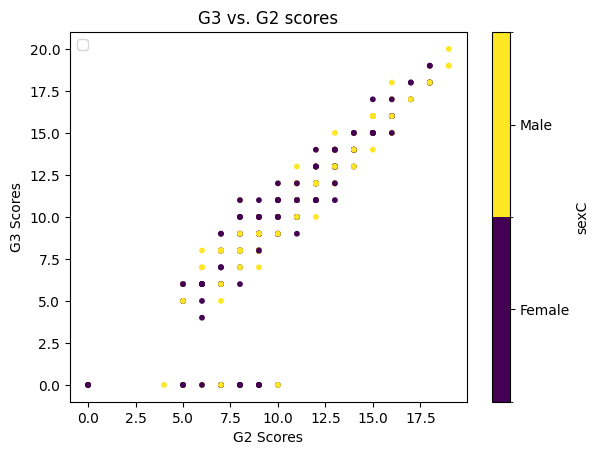

In [118]:
student_data.plot.scatter(x = "G2", y = "G3", c = "sexC", cmap = "viridis", s = 10)
plt.title("G3 vs. G2 scores")
plt.xlabel("G2 Scores")
plt.ylabel("G3 Scores")
plt.legend()

Same with the above. The plot suggests a positive association with G2 and G3 scores. There are some outliers.

# Plotting the NFL Data

## Task 1. Read in the data

In [119]:
football = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
football.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


Convert the homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface to category type variables.

In [120]:
football[["homeTeam", "awayTeam", "day",
          "stadium", "startTime", "toss",
          "roof", "surface"]]= football[["homeTeam", "awayTeam", "day", "stadium",
                                        "startTime", "toss", "roof", "surface"]].astype("category")
football["homeTeam"].dtype

CategoricalDtype(categories=['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
                  'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
                  'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
                  'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
                  'Houston Texans', 'Indianapolis Colts',
                  'Jacksonville Jaguars', 'Kansas City Chiefs',
                  'Miami Dolphins', 'Minnesota Vikings',
                  'New England Patriots', 'New Orleans Saints',
                  'New York Giants', 'New York Jets', 'Oakland Raiders',
                  'Philadelphia Eagles', 'Pittsburgh Steelers',
                  'San Diego Chargers', 'San Francisco 49ers',
                  'Seattle Seahawks', 'St. Louis Rams', 'Tampa Bay Buccaneers',
                  'Tennessee Titans', 'Washington Redskins'],
, ordered=False, categories_dtype=object)

## Task 2. Summarise the data.

We are only interested in regular season games, so remove data where week is not 1-17.

In [121]:
# check the values of week
print(football["week"].unique())

# exclude the ones thats now 1-17
nfl_reg_season = football.loc[~football["week"].isin(['WildCard', 'Division', 'ConfChamp', 'SuperBowl'])]

# check the result
print(nfl_reg_season["week"].head())
print(nfl_reg_season["week"].tail())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' 'WildCard' 'Division' 'ConfChamp' 'SuperBowl']
0    1
1    1
2    1
3    1
4    1
Name: week, dtype: object
3455    17
3456    17
3457    17
3458    17
3459    17
Name: week, dtype: object


Summarize the mean, median, and std of numeric variables, score for the home and away teams of Q1, Q4, and Final, across season and week, season alone, and week alone.

Summaries by season and week.

In [122]:
season_week_summary = (
    nfl_reg_season
    .groupby(["season", "week"])[["AQ1", "AQ4", "AFinal", "HQ1", "HQ4", "HFinal"]]
    .agg(["mean", "median", "std"])
)
season_week_summary

AQ1                        AQ4                      AFinal  \
                 mean median       std      mean median       std       mean   
season week                                                                    
2002   1     5.062500    6.5  4.358421  6.312500    7.0  5.839164  23.125000   
       10    5.571429    7.0  4.397802  6.928571    7.0  6.018744  23.500000   
       11    3.250000    0.0  4.328202  5.062500    1.5  6.826114  18.375000   
       12    4.250000    3.0  5.013316  4.437500    3.0  4.718315  21.187500   
       13    3.500000    0.0  4.746929  5.625000    4.5  5.110447  19.062500   
...               ...    ...       ...       ...    ...       ...        ...   
2014   5     2.733333    0.0  4.366539  6.333333    7.0  5.789975  19.133333   
       6     6.666667    7.0  8.474050  7.133333    7.0  3.777124  26.200000   
       7     2.600000    3.0  2.898275  6.600000    7.0  4.084815  18.133333   
       8     2.933333    0.0  4.495500  6.000000    7.0  3.946065  22.600000   
       9     2.769231    3.0  2.773501  5.615385    6.0  5.204781  21.846154   

                                    HQ1                        HQ4         \
            median        std      mean median       std      mean median   
season week                                                                 
2002   1      23.0   9.680737  4.625000    6.5  2.848976  7.187500    7.0   
       10     27.0  10.478917  3.071429    3.0  2.894671  4.571429    3.0   
       11     17.0   7.864477  4.312500    5.0  4.158826  6.375000    6.5   
       12     18.0  11.513579  2.937500    0.0  4.654299  4.750000    4.5   
       13     20.0   9.650345  4.312500    3.0  3.961797  5.687500    6.0   
...            ...        ...       ...    ...       ...       ...    ...   
2014   5      17.0   8.078779  6.533333    7.0  4.453998  6.000000    7.0   
       6      30.0  12.131423  4.266667    3.0  4.605380  6.600000    7.0   
       7      21.0   8.061076  5.066667    3.0  6.064730  6.866667    7.0   
       8      22.0   8.781474  3.800000    3.0  4.475329  8.466667    7.0   
       9      23.0  10.139413  4.692308    3.0  5.250153  7.615385    6.0   

                          HFinal                    
                  std       mean median        std  
season week                                         
2002   1     4.214558  26.125000   27.0  11.050641  
       10    4.734721  22.571429   22.0  10.580928  
       11    4.096747  22.562500   21.0   7.023473  
       12    3.732738  21.000000   20.0   8.809086  
       13    4.346934  25.000000   25.0  10.507140  
...               ...        ...    ...        ...  
2014   5     5.424811  27.933333   30.0  10.592900  
       6     4.968472  22.200000   23.0   8.554030  
       7     4.389381  25.533333   27.0   8.192912  
       8     4.138092  26.733333   23.0  13.540767  
       9     6.576961  26.384615   24.0  10.851563  

[221 rows x 18 columns]

Summaries by season.


In [123]:
season_summary = (
    nfl_reg_season
    .groupby("season")[["AQ1", "AQ4", "AFinal", "HQ1", "HQ4", "HFinal"]]
    .agg(["mean", "median", "std"])
)
season_summary

AQ1                        AQ4                      AFinal  \
            mean median       std      mean median       std       mean   
season                                                                    
2002    4.000000    3.0  4.473013  6.023438    7.0  5.266192  20.550781   
2003    3.523438    3.0  4.274805  5.316406    6.0  5.168294  19.054688   
2004    3.921875    3.0  4.510744  5.859375    7.0  5.440205  20.230469   
2005    3.894531    3.0  4.487085  5.234375    6.0  4.795397  18.792969   
2006    3.648438    3.0  4.028506  6.144531    7.0  5.591889  20.234375   
2007    3.671875    3.0  4.335190  5.910156    6.0  5.289625  20.253906   
2008    3.742188    3.0  4.209692  6.398438    7.0  5.567891  20.750000   
2009    3.847656    3.0  4.591150  5.914062    6.5  5.505829  20.363281   
2010    3.984375    3.0  4.725375  5.554688    7.0  4.864128  21.089844   
2011    3.859375    3.0  4.479556  6.000000    7.0  5.053440  20.546875   
2012    4.515625    3.0  4.729522  6.113281    7.0  5.292879  21.539062   
2013    4.035156    3.0  4.374921  6.121094    7.0  5.401251  21.855469   
2014    4.253906    3.0  4.842822  6.007812    7.0  5.271449  21.343750   

                               HQ1                        HQ4         \
       median        std      mean median       std      mean median   
season                                                                 
2002     20.5  10.064759  4.210938    3.0  4.522107  6.332031    7.0   
2003     19.0  10.251970  5.058594    5.5  4.697985  6.253906    7.0   
2004     19.0  10.175596  4.917969    6.0  4.718457  6.476562    7.0   
2005     19.0   9.948894  4.503906    3.0  4.583002  5.726562    6.0   
2006     21.0  10.386254  4.625000    3.0  5.037896  5.863281    6.0   
2007     20.0  10.703215  5.050781    4.5  4.836276  5.929688    6.0   
2008     20.0  10.420944  5.218750    6.0  4.918054  6.050781    7.0   
2009     20.0  10.672526  4.660156    3.0  4.603253  5.914062    7.0   
2010     20.0  10.288187  4.515625    3.0  4.462452  6.667969    7.0   
2011     20.0   9.634789  4.984375    3.0  4.793761  6.457031    7.0   
2012     21.5  10.404676  4.820312    3.0  4.485154  6.921875    7.0   
2013     21.0   9.664500  5.187500    6.5  4.792560  6.925781    7.0   
2014     21.0   9.877634  4.882812    3.0  4.841198  6.296875    7.0   

                     HFinal                    
             std       mean median        std  
season                                         
2002    5.271744  22.796875   23.0  10.182152  
2003    5.304270  22.609375   23.0  10.119470  
2004    5.228076  22.738281   23.0  10.400502  
2005    5.205148  22.441406   21.0   9.797383  
2006    5.182253  21.082031   20.0   9.856475  
2007    5.981256  23.121094   22.0  10.568033  
2008    5.178515  23.308594   24.0  10.454499  
2009    5.177671  22.570312   23.0  10.666557  
2010    5.686164  22.984375   23.0  10.251339  
2011    5.229452  23.812500   23.0  10.524109  
2012    5.701200  23.972656   23.0  10.559413  
2013    5.788288  24.960938   24.0  10.533534  
2014    5.323804  23.832031   23.0  10.954053

Summaries by week.

In [124]:
week_summary = (
    nfl_reg_season
    .groupby("week")[["AQ1", "AQ4", "AFinal", "HQ1", "HQ4", "HFinal"]]
    .agg(["mean", "median", "std"])
)
week_summary

AQ1                        AQ4                      AFinal         \
          mean median       std      mean median       std       mean median   
week                                                                           
1     3.427885    3.0  4.041403  5.259615    6.0  4.632369  19.716346   20.0   
10    4.580645    3.0  4.451110  6.241935    7.0  5.568305  21.543011   21.0   
11    3.970149    3.0  4.513214  5.601990    6.0  5.270749  19.592040   19.0   
12    3.653659    3.0  4.311641  5.570732    6.0  5.112568  21.507317   21.0   
13    4.192308    3.0  4.765165  5.649038    6.0  5.235230  20.437500   20.0   
14    3.836538    3.0  4.502518  4.951923    3.0  5.148762  19.394231   20.0   
15    3.913462    3.0  4.632610  6.187500    7.0  5.589711  20.942308   20.0   
16    4.096154    3.0  4.239267  6.418269    7.0  5.321822  20.802885   20.0   
17    3.725962    3.0  4.548918  5.177885    6.0  4.997786  19.235577   19.0   
2     3.531401    3.0  4.195204  5.676329    6.0  5.659992  19.545894   20.0   
3     4.202020    3.0  4.467548  6.388889    7.0  5.438654  20.767677   23.0   
4     3.967391    3.0  4.283533  6.375000    7.0  5.737960  20.983696   20.0   
5     3.565934    3.0  4.431622  6.659341    7.0  5.794300  20.527473   20.5   
6     4.143646    3.0  4.629774  6.154696    7.0  5.455715  20.679558   20.0   
7     4.311111    3.0  4.733441  6.105556    7.0  4.907522  21.111111   20.0   
8     3.342697    3.0  3.924496  5.629213    7.0  4.617290  20.151685   20.0   
9     4.179775    3.0  5.218528  6.415730    7.0  4.804210  22.146067   23.0   

                      HQ1                        HQ4                   \
            std      mean median       std      mean median       std   
week                                                                    
1      8.977768  4.225962    3.0  4.513201  6.365385    7.0  5.075389   
10    10.015705  4.973118    3.0  4.892833  6.440860    7.0  5.449448   
11    10.017122  4.502488    3.0  4.305954  5.865672    7.0  5.019648   
12    10.795160  4.702439    3.0  4.550829  6.639024    7.0  5.681621   
13    10.131786  4.889423    3.0  4.791527  6.000000    7.0  5.148050   
14    10.203171  5.125000    6.0  4.978577  6.754808    7.0  5.756951   
15    11.224393  5.269231    6.0  5.033666  5.581731    6.0  4.983359   
16    10.330041  4.822115    3.0  4.724496  5.653846    6.0  5.285600   
17    10.637064  4.557692    3.0  4.462029  6.408654    7.0  5.931275   
2     10.433170  4.879227    3.0  4.486214  6.265700    7.0  5.091582   
3      9.634781  4.873737    3.0  5.224816  6.186869    7.0  4.953636   
4     10.062361  4.684783    3.0  4.567477  6.195652    7.0  5.436648   
5     10.300824  5.137363    6.0  4.855689  6.719780    7.0  5.574562   
6     10.270079  4.817680    3.0  4.584384  6.629834    7.0  5.469206   
7     10.674927  4.833333    3.0  4.869814  6.500000    6.0  5.973405   
8      9.782639  4.842697    3.0  4.729756  6.567416    7.0  5.540652   
9      9.701244  4.808989    3.0  4.641684  6.382022    7.0  5.682773   

         HFinal                    
           mean median        std  
week                               
1     22.139423   20.5  10.595541  
10    22.983871   23.0  10.753491  
11    22.582090   22.0  10.326397  
12    22.878049   21.0  10.035220  
13    23.201923   23.0  10.579700  
14    24.605769   24.0  11.453682  
15    22.543269   21.0  10.288498  
16    22.168269   21.0  11.019331  
17    23.807692   23.0  10.339247  
2     22.840580   23.0   9.842384  
3     22.646465   23.0  10.153955  
4     24.092391   23.0  10.874704  
5     24.324176   24.0  10.158379  
6     22.988950   23.0   9.254422  
7     23.338889   23.0  10.948924  
8     23.359551   23.0  10.573121  
9     22.258427   21.5   9.152849

Plots over time.

By season and week of mean only.


Text(0, 0.5, 'Score')

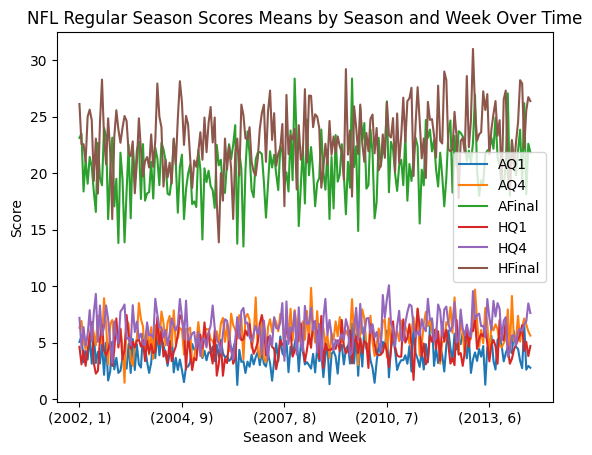

In [125]:
season_week_summary.xs("mean", axis=1, level=1).plot()
plt.legend(loc = "right")
plt.title("NFL Regular Season Scores Means by Season and Week Over Time")
plt.xlabel("Season and Week")
plt.ylabel("Score")

By season of median only.

Text(0, 0.5, 'Score')

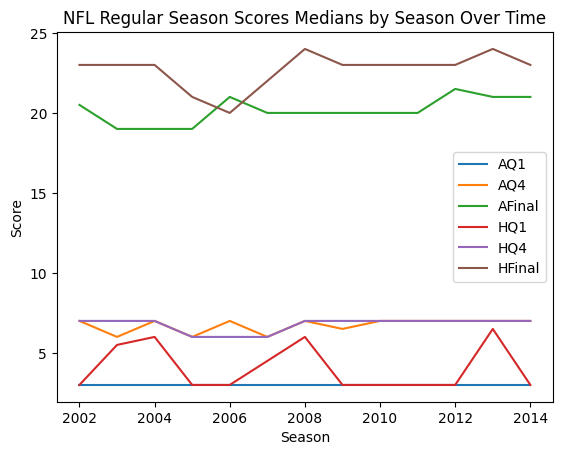

In [126]:
season_summary.xs("median", axis=1, level=1).plot()
plt.legend(loc = "right")
plt.title("NFL Regular Season Scores Medians by Season Over Time")
plt.xlabel("Season")
plt.ylabel("Score")

By week of all summaries.

Text(0, 0.5, 'Score')

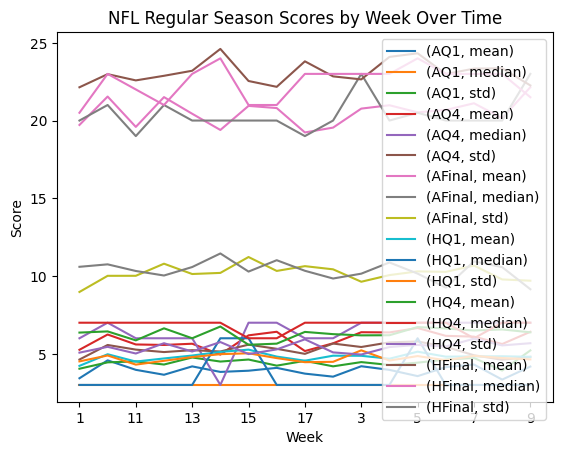

In [127]:
week_summary.plot()
plt.legend(loc = "upper right")
plt.title("NFL Regular Season Scores by Week Over Time")
plt.xlabel("Week")
plt.ylabel("Score")

Write an function to create plot of a numeric and a statistic of this data.


Let's have a function that takes in a numeric variable, a statistics, and a categorical variable. Then the function plots the statistics of the
numeric variable across the categorical variable.

In [128]:
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

In [129]:
@timeit
def plot_func(df: pd.DataFrame, num_var: str| list[str], stat: str| list[str], cat_var: str| list[str]):

    """
    Quick function to plot a single or a list numeric variable across
    one or more categorical variables.
    """

    summary = df.groupby(cat_var)[num_var].agg(stat)
    summary.plot()
    plt.legend()
    plt.title(f"NFL Regular Season {num_var} {stat} by {cat_var} Over Time")
    plt.xlabel(cat_var)
    plt.ylabel(num_var)


Now, try the function.

plot_func ran in 0.028806 seconds


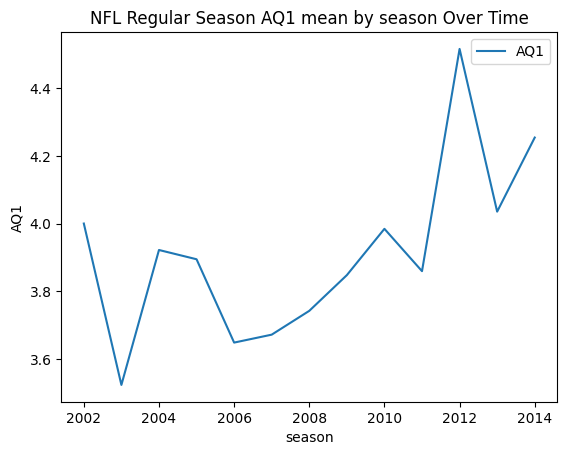

In [130]:
plot_func(nfl_reg_season, "AQ1", "mean", "season")

Away team shows a general positive trend of scores in Q1 across seasons.

plot_func ran in 0.062151 seconds


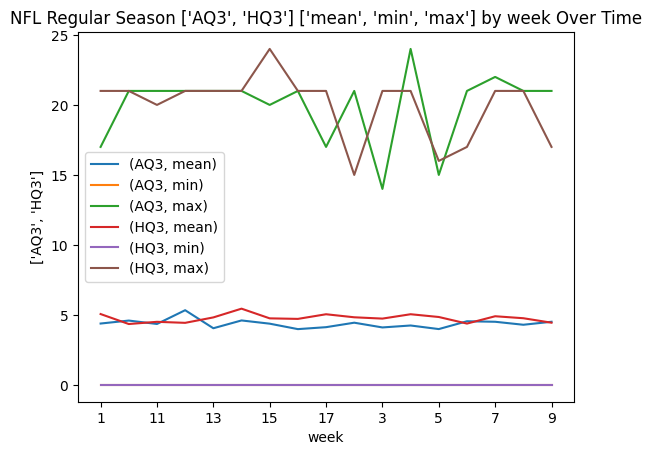

In [131]:
plot_func(nfl_reg_season, ["AQ3", "HQ3"], ["mean", "min", "max"], "week")

Both team have minimum of 0 points in Q3 across week over time. Most points in both teams tend to overlap with minimal differences. While the max ponts varies more over time, mean stays pretty stable.

plot_func ran in 0.031947 seconds


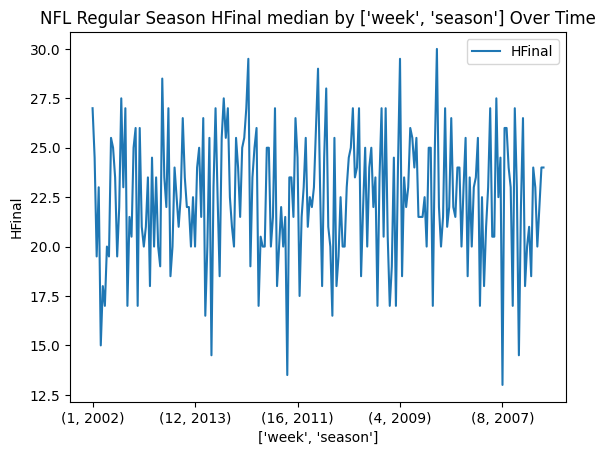

In [132]:
plot_func(nfl_reg_season, "HFinal", "median", ["week", "season"])

The median home final score shows substantial week-to-week variability but remains broadly stable across seasons.